# USA unlikely to medal

## scaling no improvement

## Grid Search made no improvements

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, fbeta_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.dummy import DummyClassifier
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('../../Combine_Data/men/hb_encoded.csv')
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_hb.csv')
hbnames = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_hbnames.csv')
hbolymp = pd.read_csv('../../Data/cleandata22-23/men22_23.csv')

# Base line using ZeroR

In [5]:

X = df.drop(columns=['medal'])  
y = df['medal']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ZeroR classifier
zero_r_clf = DummyClassifier(strategy='most_frequent', random_state=42)

zero_r_clf.fit(X_train, y_train)

# Make predictions test data
y_pred = zero_r_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("ZeroR Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


ZeroR Classifier
Accuracy: 0.9802
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       0.00      0.00      0.00         2

    accuracy                           0.98       101
   macro avg       0.49      0.50      0.49       101
weighted avg       0.96      0.98      0.97       101

Confusion Matrix:
[[99  0]
 [ 2  0]]


# Model Comparison


In [7]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(),
}

results = {}

# Iterate through each classifier
for name, clf in classifiers.items():
    # Create a pipeline with StandardScaler for classifiers that require it
    if name in ["SVM", "K-Nearest Neighbors", "Neural Network"]:
        clf = make_pipeline(StandardScaler(), clf)

    # Fit model to the training data
    clf.fit(X_train, y_train)

    # Make predictions on test data
    y_pred = clf.predict(X_test)

    # Evaluate model's performance
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    beta = 2
    f2_score = fbeta_score(y_test, y_pred, beta=beta)

    results[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": conf_matrix,
        "f2_score": f2_score,
    }
    
for name, result in results.items():
    print(f"Classifier: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"F2-Score: {result['f2_score']:.4f}")
    print(f"Classification Report:\n{result['classification_report']}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}\n")


Classifier: Random Forest
Accuracy: 0.9802
F2-Score: 0.0000
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       0.00      0.00      0.00         2

    accuracy                           0.98       101
   macro avg       0.49      0.50      0.49       101
weighted avg       0.96      0.98      0.97       101

Confusion Matrix:
[[99  0]
 [ 2  0]]

Classifier: AdaBoost
Accuracy: 0.9802
F2-Score: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        99
           1       0.50      0.50      0.50         2

    accuracy                           0.98       101
   macro avg       0.74      0.74      0.74       101
weighted avg       0.98      0.98      0.98       101

Confusion Matrix:
[[98  1]
 [ 1  1]]

Classifier: SVM
Accuracy: 0.9802
F2-Score: 0.0000
Classification Report:
              precision    recall  f

Classifier: Decision Tree
Accuracy: 0.9870

Classifier: AdaBoost
Accuracy: 0.9870

# Grid Search made no improvements

In [6]:
from sklearn.model_selection import GridSearchCV

# Define  parameter grid
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
    'base_estimator__max_depth': [1, 2, 3]
}

# Initialize AdaBoost classifier
base_classifier = DecisionTreeClassifier()
clf = AdaBoostClassifier(base_classifier)

# Create grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Fit grid search to training data
grid_search.fit(X_train, y_train)

# Get best estimator from grid search
best_clf = grid_search.best_estimator_

# Make predictions on test data
y_pred = best_clf.predict(X_test)

# Evaluate model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("AdaBoost Classifier with Grid Search")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")


AdaBoost Classifier with Grid Search
Best Hyperparameters: {'base_estimator__max_depth': 3, 'learning_rate': 0.2, 'n_estimators': 30}
Accuracy: 0.9901
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        99
           1       1.00      0.50      0.67         2

    accuracy                           0.99       101
   macro avg       0.99      0.75      0.83       101
weighted avg       0.99      0.99      0.99       101

Confusion Matrix:
[[99  0]
 [ 1  1]]


# Feature Importance

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier

y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Initialize AdaBoost classifier
clf = AdaBoostClassifier(n_estimators=20, learning_rate=0.35)

# Fit model to the training data
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = clf.feature_importances_

print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance:.4f}")


Feature Importances:
Rank: 0.2000
D: 0.0000
E: 0.0000
ND: 0.0000
year: 0.0500
Total: 0.1500
Name: 0.2500
Nation: 0.3500
round_final: 0.0000
round_qual: 0.0000


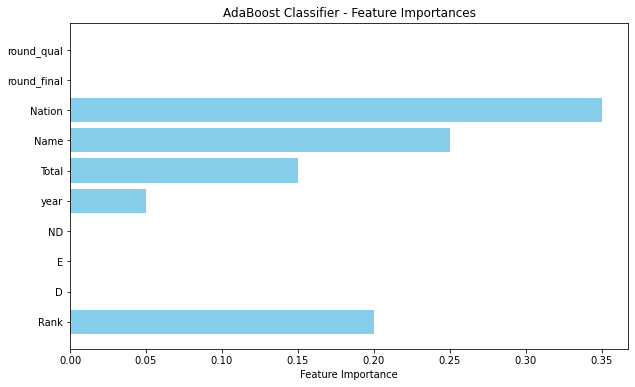

In [8]:
import matplotlib.pyplot as plt


# Extract feature importances
feature_importances = clf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('AdaBoost Classifier - Feature Importances')
plt.show()


# Final MOdel

In [9]:
y = df['medal']
X = df.drop(columns=['medal'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)

# Initialize AdaBoost classifier
# CHANGING LEARNIN RATE TO 0.31 RESULTS IN 1.000 
clf = AdaBoostClassifier(n_estimators=20, learning_rate=0.35)

# Fit model to training data
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred = clf.predict(X_test)

# Evaluate model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("AdaBoost Classifier")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")

AdaBoost Classifier
Accuracy: 0.9836
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       1.00      0.50      0.67         2

    accuracy                           0.98        61
   macro avg       0.99      0.75      0.83        61
weighted avg       0.98      0.98      0.98        61

Confusion Matrix:
[[59  0]
 [ 1  1]]


# Model Trained earlier using 2023/2022 data

In [10]:
olymp = pd.read_csv('../../Data/cleandata22-23/encoded_m_olympics_hb.csv')


In [11]:
olymp.rename(columns={'D Score': 'D', 'E Score': 'E',
                     'Pen.': 'ND', 'nation': 'Nation'}, inplace=True)

In [12]:
olymp=olymp.drop(columns=['round_TeamFinal', 'round_AAfinal', 'round_TeamQual'])

In [13]:
desired_column_order = ['Rank', 'D', 'E', 'ND', 'year', 'Total', 'Name', 'Nation',
       'round_final', 'round_qual'] 

# Create DataFrame with the desired column order
olymp = olymp[desired_column_order]

In [14]:
y_pred = clf.predict(olymp)


In [15]:
ypreds  = pd.Series(y_pred)
olymp['ypred']=ypreds


In [16]:
olymp['ypred'].value_counts()

ypred
0    2342
1       2
Name: count, dtype: int64

In [17]:
filtered_df = olymp[olymp['ypred'] == 1]

In [18]:
filtered_df['Name'].unique()

array([731, 593])

# hbnames used to match encoded names with actual names

In [19]:
name_encoded_values = [731, 593]

# Filter DataFrame to get the corresponding values
result = hbnames.loc[hbnames['Name_encoded'].isin(name_encoded_values), 'Name']


In [20]:
result.unique()

array(['yumin abbadini', 'robert tvorogal'], dtype=object)

# hbolymp used to get country info from name list above

In [21]:
hbolymp["Name"]=hbolymp["Name"].str.lower()

In [22]:
names_to_filter =['yumin abbadini', 'robert tvorogal']

# Filter the DataFrame to get rows with the specified values
result = hbolymp[hbolymp['Name'].isin(names_to_filter)]

In [23]:
result['Country'].value_counts()

Country
ITA    55
LTU    53
Name: count, dtype: int64